In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices(device_type="GPU")
tf.config.experimental.set_visible_devices(devices=gpus[0], device_type="GPU")
tf.config.experimental.set_memory_growth(device=gpus[0], enable=True)

IndexError: list index out of range

In [1]:
import tensorflow as tf

# Data Preparation and Processing


In [2]:
import numpy as np
from ran dom import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels = []
train_samples = []

Creating data from random case study

As motivation for this data, let’s suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

Ultimately, we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data. 


In [4]:
# 1 represents side effect
# 0 represents no side effect
# generating random data

for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)




In [5]:
train_samples[:5]

[36, 94, 33, 85, 40]

In [6]:
# Convert to numpy
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

# Shuffle all the generated data into random order
train_labels, train_samples = shuffle(train_labels, train_samples)


In [7]:
# Scale down the data from 13 to 100 age to 0-1
# Reshape so the scaler accepts the data
# Scaling due to batch normalization

scaler = MinMaxScaler(feature_range = (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [8]:
# Rescaled ages
scaled_train_samples[:5]

array([[0.82758621],
       [0.1954023 ],
       [0.81609195],
       [0.51724138],
       [0.89655172]])

# Creating the ANN


In [9]:
# Import stuff for creating the neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

# import modules for training the neural network
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
# Sequential model is a linear stack of layers
# easiest model to make

model = Sequential([

    # First hidden layer, second layer after input data
    
    # Dense, or fully connected layer
    
    Dense(units=16, input_shape=(1,), activation ='relu'), # 16 nodes for no particular reason
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')  # 2 nodes for each output either with or without side effects
    # softmax, probabilities for each class, which class is more probable for each patient
    
])



In [11]:
# visual representation of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Training the ANN

In [12]:
# prepare for training
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# shuffle always true
# verbose shows the training
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=1)

Train on 2100 samples
Epoch 1/30
2100/2100 [==============================] - 2s 831us/sample - loss: 0.7153 - accuracy: 0.3310
Epoch 2/30
2100/2100 [==============================] - 1s 245us/sample - loss: 0.6763 - accuracy: 0.5743
Epoch 3/30
2100/2100 [==============================] - 0s 231us/sample - loss: 0.6416 - accuracy: 0.6462
Epoch 4/30
2100/2100 [==============================] - 0s 230us/sample - loss: 0.6009 - accuracy: 0.7314
Epoch 5/30
2100/2100 [==============================] - 0s 219us/sample - loss: 0.5679 - accuracy: 0.7629
Epoch 6/30
2100/2100 [==============================] - 0s 191us/sample - loss: 0.5376 - accuracy: 0.8033
Epoch 7/30
2100/2100 [==============================] - 0s 182us/sample - loss: 0.5042 - accuracy: 0.8229
Epoch 8/30
2100/2100 [==============================] - 0s 179us/sample - loss: 0.4712 - accuracy: 0.8419
Epoch 9/30
2100/2100 [==============================] - 0s 180us/sample - loss: 0.4400 - accuracy: 0.8676
Epoch 10/30
2100/2100 [=

# Validation Set


In [14]:
# split occurs before the shuffle
# validation only has of the last group
# Need to shuffle it before running model fit

model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=1)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 [==============================] - 1s 387us/sample - loss: 0.2551 - accuracy: 0.9402 - val_loss: 0.2848 - val_accuracy: 0.9143
Epoch 2/30
1890/1890 [==============================] - 1s 408us/sample - loss: 0.2540 - accuracy: 0.9402 - val_loss: 0.2842 - val_accuracy: 0.9143
Epoch 3/30
1890/1890 [==============================] - 1s 545us/sample - loss: 0.2529 - accuracy: 0.9418 - val_loss: 0.2835 - val_accuracy: 0.9143
Epoch 4/30
1890/1890 [==============================] - 1s 473us/sample - loss: 0.2519 - accuracy: 0.9429 - val_loss: 0.2827 - val_accuracy: 0.9143
Epoch 5/30
1890/1890 [==============================] - 1s 574us/sample - loss: 0.2509 - accuracy: 0.9386 - val_loss: 0.2821 - val_accuracy: 0.9143
Epoch 6/30
1890/1890 [==============================] - 1s 522us/sample - loss: 0.2500 - accuracy: 0.9413 - val_loss: 0.2817 - val_accuracy: 0.9238
Epoch 7/30
1890/1890 [==============================] - 1s 511us/

# Predictions

### Creating a test set for inference

In [49]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [50]:
# Prepared and processed just like the trained data was
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
# don't shuffle?
#test_labels, test_sample = shuffle(test_labels, test_samples)

In [51]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict on test data

In [52]:
# predict on previous model created
# no use for verbose =1
prediction = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [53]:
# predicts that the model came up with for each sample
# probability of patient having a side effect and not having a side effect
# [0.9743916  0.02560844]  
# No side effect is 0, and side effect is 1 index
# 97% chance of having no side effect
prediction[:9]

array([[0.9714972 , 0.02850278],
       [0.06488074, 0.9351193 ],
       [0.59771925, 0.40228084],
       [0.02103195, 0.9789681 ],
       [0.97171414, 0.02828591],
       [0.02103195, 0.9789681 ],
       [0.8157104 , 0.18428959],
       [0.06488074, 0.9351193 ],
       [0.9747809 , 0.02521905]], dtype=float32)

In [54]:
# 0 or 1 for each test data
rounded_predictions = np.argmax(prediction, axis=-1)

In [55]:
rounded_predictions[:6]

array([0, 1, 0, 1, 0, 1], dtype=int64)

# Confusion Matrix

In [56]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [57]:
# pass in test labels and the predictions
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_prediction)

In [58]:
# sklearn's confusion matrix copied from website
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


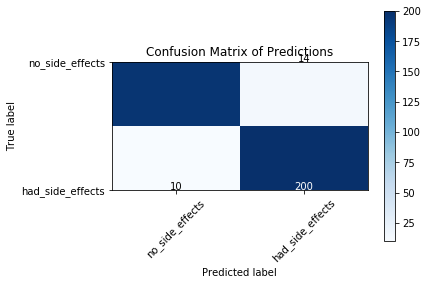

In [59]:
# define labels for matrix
cm_plot_labels = ['no_side_effects', 'had_side_effects']
# Call function and plot
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix of Predictions')
# diagonal from top left to bottom right is correct predictions
# other squares are false positive and false negative

# Save and Load Model


In [60]:
# previous model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1. model.save()

In [62]:
# check if file exists and then save
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

Considered the most comprehensive
Saves:
- architecture of model
- weights of model
- training configurations (loss, optimizer)
- state of optimizer, resume training where you left off - research this

In [63]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [64]:
new_model.summary()
# same architecture as before

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [65]:
# check weights
new_model.get_weights()

[array([[ 0.6520407 , -0.3959513 , -0.02833846, -0.27684376, -0.42272258,
          0.35438883,  0.24018747,  0.22748165, -0.4570169 ,  0.21407452,
         -0.1858586 ,  0.36255807, -0.0175603 ,  0.7628906 ,  0.0746524 ,
          0.45341265]], dtype=float32),
 array([-0.18991548,  0.        ,  0.1409936 ,  0.        ,  0.        ,
        -0.15411395, -0.11195226, -0.10705955,  0.        , -0.09662023,
         0.        ,  0.10106729,  0.        , -0.18939054,  0.22774158,
        -0.17242807], dtype=float32),
 array([[ 6.05425894e-01,  1.08620450e-01, -6.11416221e-01,
          5.20042598e-01, -2.50029355e-01, -2.75527179e-01,
         -2.98288524e-01, -5.30053191e-02,  3.13555837e-01,
         -2.57630348e-01,  3.61526549e-01, -1.83970571e-01,
         -2.29368031e-01,  6.45496845e-01, -3.98391932e-01,
         -2.82601148e-01, -4.96787548e-01,  3.58794510e-01,
         -3.57280403e-01,  2.54009604e-01,  5.56577265e-01,
         -3.39706019e-02,  3.40523720e-01,  8.53323713e-02,
 

In [68]:
new_model.optimizer

### 2. model.to_json()

Only save the model's architecture and save as a json string

In [69]:
json_string = model.to_json()
# save as yaml in similair way
# yaml_string = model.to_yaml()

In [70]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [71]:
# create new model with old model's architecture, would need to retrain and optimizer and loss
# model reconstruction from JSON
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# Same thing with yaml
# from tensorflow.keras.models import model_from_yaml
# model_architecture = model_from_yaml(yaml_string)

In [73]:
# identical to architecture of the og model
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

## Only save the weights of a model, not the training configurations or the architecture

In [76]:
# check if file exists and then save
import os.path
if os.path.isfile('models/model_weights.h5') is False:
    model.save_weights('models/model_weights.h5')

In [77]:
# create the new model with the same architecture
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [78]:
model2.load_weights('models/model_weights.h5')

In [79]:
model2.get_weights()

[array([[ 0.6520407 , -0.3959513 , -0.02833846, -0.27684376, -0.42272258,
          0.35438883,  0.24018747,  0.22748165, -0.4570169 ,  0.21407452,
         -0.1858586 ,  0.36255807, -0.0175603 ,  0.7628906 ,  0.0746524 ,
          0.45341265]], dtype=float32),
 array([-0.18991548,  0.        ,  0.1409936 ,  0.        ,  0.        ,
        -0.15411395, -0.11195226, -0.10705955,  0.        , -0.09662023,
         0.        ,  0.10106729,  0.        , -0.18939054,  0.22774158,
        -0.17242807], dtype=float32),
 array([[ 6.05425894e-01,  1.08620450e-01, -6.11416221e-01,
          5.20042598e-01, -2.50029355e-01, -2.75527179e-01,
         -2.98288524e-01, -5.30053191e-02,  3.13555837e-01,
         -2.57630348e-01,  3.61526549e-01, -1.83970571e-01,
         -2.29368031e-01,  6.45496845e-01, -3.98391932e-01,
         -2.82601148e-01, -4.96787548e-01,  3.58794510e-01,
         -3.57280403e-01,  2.54009604e-01,  5.56577265e-01,
         -3.39706019e-02,  3.40523720e-01,  8.53323713e-02,
 